In [3]:
import pandas as pd

# Load the dataset
file_path = '/home/lindah/Downloads/COVID_19/owid-covid-data.csv'
df = pd.read_csv(file_path)

# Preview the first 5 rows
df.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Check for Missing Values



In [5]:
df.isnull().sum().sort_values(ascending=False).head(20)


weekly_icu_admissions                      418442
weekly_icu_admissions_per_million          418442
excess_mortality                           416024
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality_cumulative_per_million    416024
weekly_hosp_admissions                     404938
weekly_hosp_admissions_per_million         404938
icu_patients_per_million                   390319
icu_patients                               390319
hosp_patients_per_million                  388779
hosp_patients                              388779
total_boosters_per_hundred                 375835
total_boosters                             375835
new_vaccinations                           358464
new_tests                                  354032
new_tests_per_thousand                     354032
people_fully_vaccinated_per_hundred        351374
people_fully_vaccinated                    351374
total_tests                                350048


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

# Convert date column to datetime

In [7]:
df['date'] = pd.to_datetime(df['date'])


In [12]:
# Let’s work with Kenya, United States, and India to start:
countries = ['Kenya']
df_filtered = df[df['location'].isin(countries)].copy()


In [13]:
#Let’s reduce to just the essential columns for time series analysis:
columns_to_keep = [
    'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
    'population'
]

df_filtered = df_filtered[columns_to_keep]


In [15]:
df_filtered.tail()

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,population
196991,Kenya,2024-07-31,344106.0,0.0,5689.0,0.0,NaN,NaN,NaN,54027484
196992,Kenya,2024-08-01,344106.0,0.0,5689.0,0.0,NaN,NaN,NaN,54027484
196993,Kenya,2024-08-02,344106.0,0.0,5689.0,0.0,NaN,NaN,NaN,54027484
196994,Kenya,2024-08-03,344106.0,0.0,5689.0,0.0,NaN,NaN,NaN,54027484
196995,Kenya,2024-08-04,344106.0,0.0,5689.0,0.0,NaN,NaN,NaN,54027484


# EDA 

In [36]:
countries = ['Kenya', 'United States', 'India', 'Brazil', 'Germany']
df_filtered = df[df['location'].isin(countries)].copy()
df_filtered['date'] = pd.to_datetime(df_filtered['date'])


In [38]:
df_filtered.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
50234,BRA,South America,Brazil,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN
50235,BRA,South America,Brazil,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN
50236,BRA,South America,Brazil,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN
50237,BRA,South America,Brazil,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN
50238,BRA,South America,Brazil,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,17.9,NaN,2.2,75.88,0.765,215313504,NaN,NaN,NaN,NaN


-- Total COVID-19 Cases Over Time

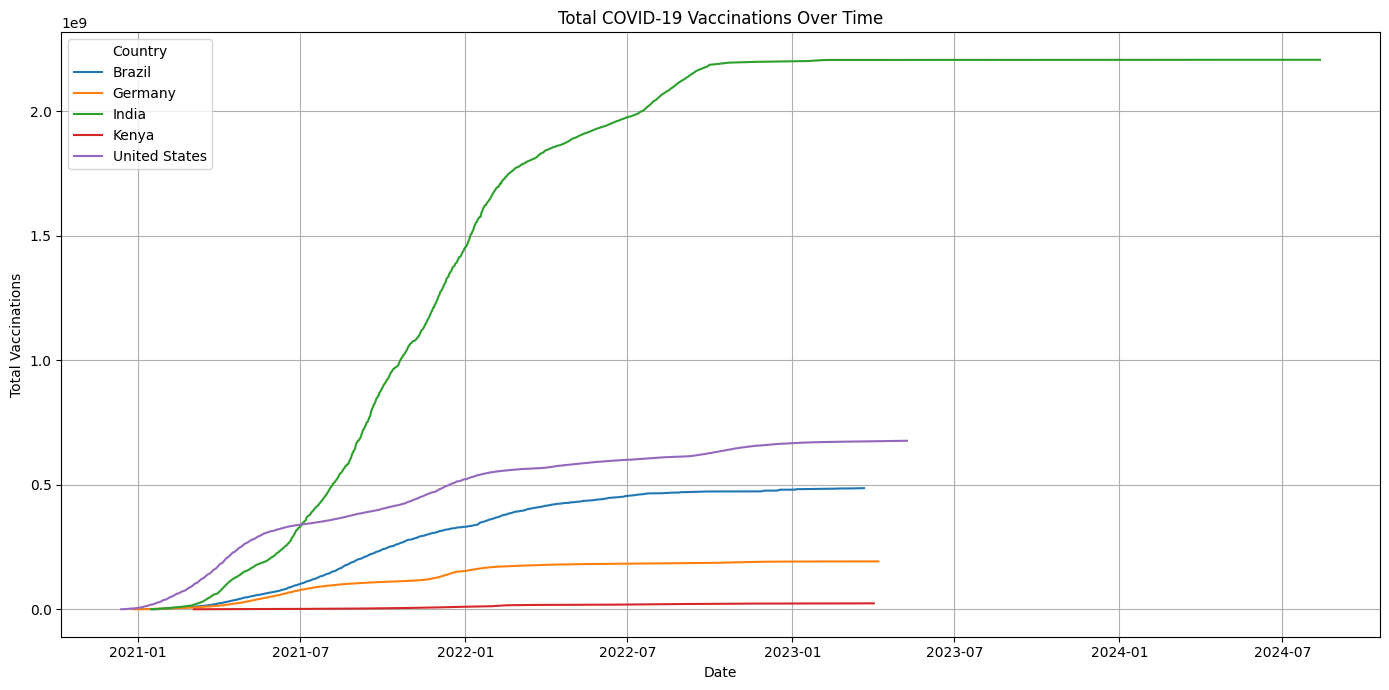

In [39]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtered, x='date', y='total_vaccinations', hue='location')
plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


Key Observations:
India (green line) leads with the highest total vaccinations, surpassing 1.5 billion doses.

The United States (purple line) follows with a steady increase, reaching several hundred million vaccinations.

Brazil (blue) and Germany (orange) show similar trends, increasing over time but staying well below India's numbers.

Kenya (red line) has the lowest total vaccinations among the five countries, reflecting differences in vaccine distribution and accessibility.

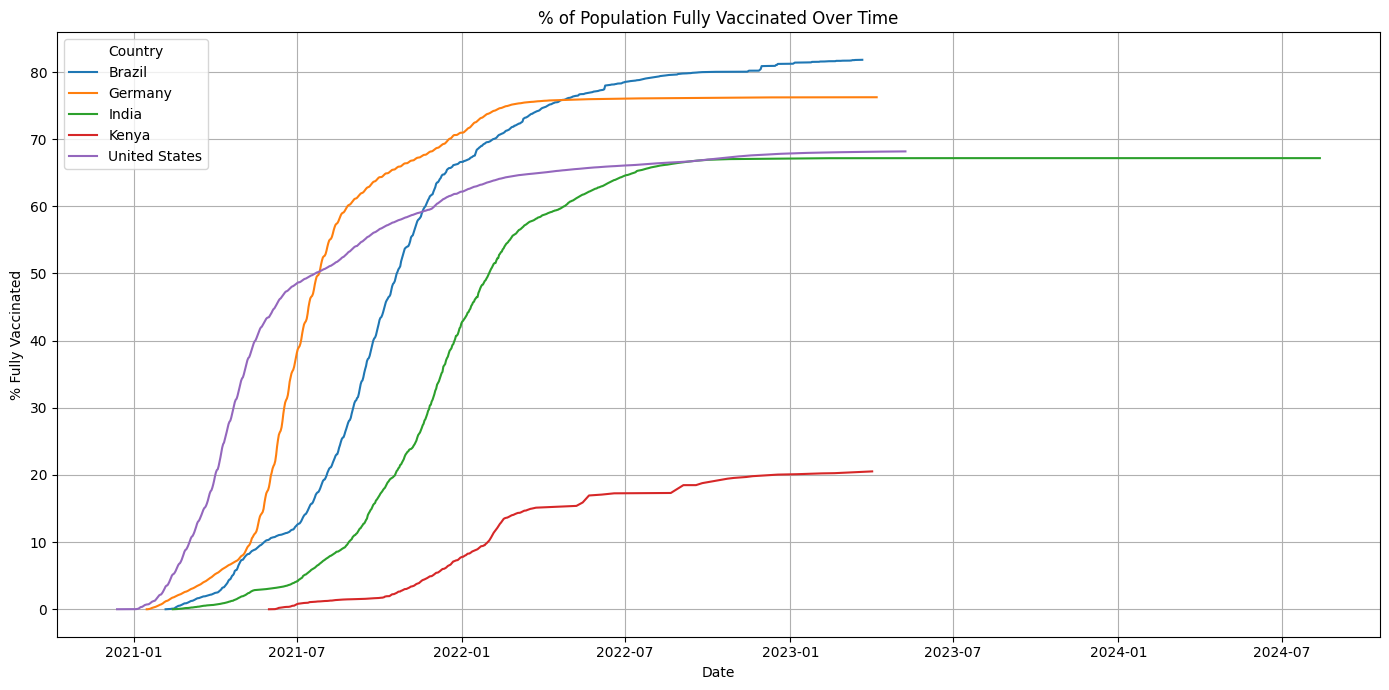

In [40]:
# Create percentage column
df_filtered['pct_fully_vaccinated'] = (
    df_filtered['people_fully_vaccinated'] / df_filtered['population']
) * 100

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtered, x='date', y='pct_fully_vaccinated', hue='location')
plt.title('% of Population Fully Vaccinated Over Time')
plt.xlabel('Date')
plt.ylabel('% Fully Vaccinated')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()


This graph, titled "% of Population Fully Vaccinated Over Time," shows the vaccination progress in Brazil, Germany, India, Kenya, and the United States from early 2021 to mid-2024.

Key Observations:
Brazil (blue) and Germany (orange) reached high vaccination rates, exceeding 70% of their population.

United States (purple) followed closely, reaching around 65-70%.

India (green) had a more gradual increase, reaching close to 60%.

Kenya (red) has the lowest vaccination rate, remaining well below 30% throughout the timeline.

Choropleth of % Fully Vaccinated

In [45]:
import plotly.express as px

latest_choropleth = df.sort_values('date').groupby('location').tail(1)
latest_choropleth['pct_fully_vaccinated'] = (
    latest_choropleth['people_fully_vaccinated'] / latest_choropleth['population']
) * 100

fig = px.choropleth(
    latest_choropleth,
    locations='iso_code',
    color='pct_fully_vaccinated',
    hover_name='location',
    color_continuous_scale='Blues',
    title='% Fully Vaccinated by Country',
)
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed